# BGC analysis

Author: Sandra Godinho Silva \
Creation date: 2/10/2020 \
Version: 0.3

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Metadata

In [4]:
metadata = pd.read_csv("All_info.csv")
metadata.head(2)
len(metadata)

2680

## Number BGCs per type

In [5]:
bgc = pd.read_csv("../../3_Annotation/antismash_results/BGCs_resumed.csv")
bgc = bgc.set_index("index").T
bgc["Nr_BGCs"] = bgc.sum(axis=1)
bgc.head()
len(bgc)

2542

In [6]:
bgc.sort_values(by="Nr_BGCs",ascending=False)

index,NRPS,NRPS_PKS_hybrid,NRPS_other,Others,PKSI,PKSIII,PKS_other,RiPPs,Siderophore,terpene,transAT_PSK,Nr_BGCs
GCA_902728265.1,24,1,2,1,0,0,0,3,0,0,0,31
GCA_008370685.1,5,3,0,3,0,1,1,4,1,3,2,23
GCA_902804485.1,11,2,0,3,1,0,1,1,1,2,0,22
GCA_000430665.1,8,1,2,1,0,1,0,0,1,2,4,20
GCA_003709475.1,9,3,3,2,0,0,0,2,0,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...
GCA_002682935.1,0,0,0,0,0,0,0,0,0,1,0,1
GCA_900112595.1,0,0,0,0,0,0,0,0,0,1,0,1
GCA_008056315.1,0,0,0,0,0,0,0,0,0,1,0,1
GCA_002426785.1,0,0,0,0,0,0,0,0,0,1,0,1


## All information about each BGC

In [7]:
bgc_info = pd.read_csv("../../3_Annotation/antismash_results/all_BGC_info.csv")
bgc_info = bgc_info.rename(columns={"Most_similar_known_ cluster":"Most_similar_known_cluster"})
bgc_info.head(2)

,Genome,Region_Type,antiSMASH_classif,new_classif,From,To,Size(bp),Most_similar_known_cluster,Most_similar_classif,Similarity,Correct_name
0,GCA_002831645.1,Region&nbsp1,T3PKS,PKSIII,582350.0,623402,41052.0,NaN,NaN,NaN,GCA_002831645_contig1.region001
1,GCA_002831645.1,Region&nbsp2,"terpene,bacteriocin",Others,1879449.0,1909353,29904.0,NaN,NaN,NaN,GCA_002831645_contig1.region002


In [8]:
len(bgc_info)

9330

In [9]:
bgc_known = bgc_info[bgc_info["Most_similar_classif"].notnull()]
bgc_known.head(2)

,Genome,Region_Type,antiSMASH_classif,new_classif,From,To,Size(bp),Most_similar_known_cluster,Most_similar_classif,Similarity,Correct_name
2,GCA_002831645.1,Region&nbsp3,terpene,terpene,2137564.0,2160010,22446.0,carotenoid,Terpene,28%,GCA_002831645_contig1.region003
5,GCA_001971785.1,Region&nbsp2,terpene,terpene,2834169.0,2855008,20839.0,carotenoid,Terpene,28%,GCA_001971785_contig1.region002


In [10]:
len(bgc_known)

4344

In [11]:
100-len(bgc_known)/len(bgc_info)*100

53.440514469453376

### Merge with metadata:

In [12]:
bgc_metadata = pd.merge(bgc_info, metadata, how="left", left_on="Genome", right_on="Assembly accession")
bgc_metadata["Family"].value_counts()
#a = bgc_metadata[bgc_metadata["Family"]!="Flavobacteriaceae"] 
#a[a["Family"] !="Weeksellaceae"]

Flavobacteriaceae    6165
Weeksellaceae        3163
Name: Family, dtype: int64

In [13]:
bgc_metadata.head()

,Genome,Region_Type,antiSMASH_classif,new_classif,From,To,Size(bp),Most_similar_known_cluster,Most_similar_classif,Similarity,Correct_name,Assembly accession,Bin_Id,Marker lineage,Completeness,Contamination,Strain_heterogeneity,Quality_score,classification,Domain,Phyla,Class,Order,Family,Genus,Species,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,Classification_quality,orfs,pfam,ko,cog,cazymes,Orfs_anno_pfam%,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,ASM name,Alias,Altitude,Anonymized name,Arrayexpress species,Arrayexpress strain or line,Assembly level,Assembly method,Assembly method resumed,Biomaterial provider,Bioproject accession,Biosample accession,Biosample model,Biosample title,Biotic relationship,Body sample site,Cell shape,Collected by,Collection date,Comment paragraph,Completion date,Contact email,Contact lab,Contigs,Country,Culture collection,Depth,Derived from,Description,Disease,ENA checklist,ENA-first-public,ENA-last-update,Elevation,Env biome,Env broad scale,Env feature,Env local scale,Env material,Env medium,Environment,Environmental sample,Estimated size,Excluded from refseq,FDA cvm ID,Finishing strategy (depth of coverage),First name,Ftp path,GOLD stamp ID,Gbrs paired ASM,Genbank accessions,Gene calling method,Genome name,Genome quality flags,Genome rep,Genome status,Genotype,Geographic location,Geographic location (city),Geographic location (country or region),Gram stain,Habitat,Host,Host age,Host disease,Host disease outcome,Host gender,Host health,Host name,Host resumed,Host scientific name,Host sex,Host taxid,Host tissue sampled,INSDC center alias,INSDC center name,INSDC first public,INSDC last update,INSDC status,Identification method,Identified by,Infraspecific name,Investigation type,Isol growth condt,Isolate,Isolation comments,Isolation country,Isolation site,Isolation source,Last name,Latitude,Locus tag prefix,Longitude,MLST,Mapping method and version,Material,Metagenome source,Misc param,Misc param: hmp supersite,Motility,Name,Ncbi taxon ID,Note,Organism,Organism name,Other clinical,Other environmental,Oxygen requirement,Paired ASM comp,Phenotypes,Plasmids,Project name,Project type,Publication,Publication date,Ref biomaterial,Refseq accessions,Refseq category,Refseq cds,Rel to oxygen,Relation to type material,Release type,SRA accession,Salinity,Sample accession,Sample name,Sample type,Seq rel date,Sequencing centers,Sequencing depth,Sequencing method,Sequencing platform,Sequencing platform resumed,Sequencing status,Source mat ID,Species taxid,Specific host,Sporulation,Strain,Strain name alias,Subject ID,Submission model,Submission package,Submitter,Subsrc note,Supplier name,Taxid,Temperature,Temperature optimum,Temperature range,Title,Trophic level,Type material,Type strain,Value,Version status,WGS master,pH,Terrestrial_coordinates,MAG,Origin
0,GCA_002831645.1,Region&nbsp1,T3PKS,PKSIII,582350.0,623402,41052.0,NaN,NaN,NaN,GCA_002831645_contig1.region001,GCA_002831645.1,GCA_002831645.1_ASM283164v1_genomic,s__algicola (UID2846),99.67,0.33,0.0,98.02,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Olleya,Olleya sp002831645,1.0,1.0,4314320.0,4314320.0,0.0,1.0,4314320.0,1.0,4314320.0,1.0,4314320.0,1.0,4314320.0,4314320.0,4314320.0,1.0,100.0,0.32759,0.0,High,3835.0,2862.0,1368.0,2230.0,90.0,74.628422,35.671447,58.148631,2.346806,ASM283164v1,NaN,NaN,NaN,NaN,NaN,Complete Genome,Unicycler v. 0.3.1,Unicycler v. 0.3.1,NaN,PRJNA420923,SAMN08125748,NaN,MIGS Cultured Bacterial/Archaeal sample from O...,NaN,NaN,NaN,NaN,2014,Keywords: GSC:MIxS;MIGS:5.0,2017-12-11T00:00:00Z,cryomics@gmail.com,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,marine biome,NaN,sea ice floe,NaN,sea ice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eric,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002...,NaN,GCF_002831645.1,CP025117,NaN,Olleya sp. Bg11-27,NaN,F

Flavobacteriaceae has more two genomes that are currently without taxnomic identification

In [14]:
bgc_known_metadata = pd.merge(bgc_known, metadata, how="left", left_on="Genome", right_on="Assembly accession")
#bgc_known_metadata = merged.set_index("Genome")
bgc_known_metadata.head(2)

,Genome,Region_Type,antiSMASH_classif,new_classif,From,To,Size(bp),Most_similar_known_cluster,Most_similar_classif,Similarity,Correct_name,Assembly accession,Bin_Id,Marker lineage,Completeness,Contamination,Strain_heterogeneity,Quality_score,classification,Domain,Phyla,Class,Order,Family,Genus,Species,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,Classification_quality,orfs,pfam,ko,cog,cazymes,Orfs_anno_pfam%,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,ASM name,Alias,Altitude,Anonymized name,Arrayexpress species,Arrayexpress strain or line,Assembly level,Assembly method,Assembly method resumed,Biomaterial provider,Bioproject accession,Biosample accession,Biosample model,Biosample title,Biotic relationship,Body sample site,Cell shape,Collected by,Collection date,Comment paragraph,Completion date,Contact email,Contact lab,Contigs,Country,Culture collection,Depth,Derived from,Description,Disease,ENA checklist,ENA-first-public,ENA-last-update,Elevation,Env biome,Env broad scale,Env feature,Env local scale,Env material,Env medium,Environment,Environmental sample,Estimated size,Excluded from refseq,FDA cvm ID,Finishing strategy (depth of coverage),First name,Ftp path,GOLD stamp ID,Gbrs paired ASM,Genbank accessions,Gene calling method,Genome name,Genome quality flags,Genome rep,Genome status,Genotype,Geographic location,Geographic location (city),Geographic location (country or region),Gram stain,Habitat,Host,Host age,Host disease,Host disease outcome,Host gender,Host health,Host name,Host resumed,Host scientific name,Host sex,Host taxid,Host tissue sampled,INSDC center alias,INSDC center name,INSDC first public,INSDC last update,INSDC status,Identification method,Identified by,Infraspecific name,Investigation type,Isol growth condt,Isolate,Isolation comments,Isolation country,Isolation site,Isolation source,Last name,Latitude,Locus tag prefix,Longitude,MLST,Mapping method and version,Material,Metagenome source,Misc param,Misc param: hmp supersite,Motility,Name,Ncbi taxon ID,Note,Organism,Organism name,Other clinical,Other environmental,Oxygen requirement,Paired ASM comp,Phenotypes,Plasmids,Project name,Project type,Publication,Publication date,Ref biomaterial,Refseq accessions,Refseq category,Refseq cds,Rel to oxygen,Relation to type material,Release type,SRA accession,Salinity,Sample accession,Sample name,Sample type,Seq rel date,Sequencing centers,Sequencing depth,Sequencing method,Sequencing platform,Sequencing platform resumed,Sequencing status,Source mat ID,Species taxid,Specific host,Sporulation,Strain,Strain name alias,Subject ID,Submission model,Submission package,Submitter,Subsrc note,Supplier name,Taxid,Temperature,Temperature optimum,Temperature range,Title,Trophic level,Type material,Type strain,Value,Version status,WGS master,pH,Terrestrial_coordinates,MAG,Origin
0,GCA_002831645.1,Region&nbsp3,terpene,terpene,2137564.0,2160010,22446.0,carotenoid,Terpene,28%,GCA_002831645_contig1.region003,GCA_002831645.1,GCA_002831645.1_ASM283164v1_genomic,s__algicola (UID2846),99.67,0.33,0.0,98.02,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Olleya,Olleya sp002831645,1,1,4314320,4314320,0.0,1,4314320,1,4314320,1,4314320,1,4314320,4314320,4314320,1,100.0,0.32759,0.0,High,3835,2862,1368,2230,90,74.628422,35.671447,58.148631,2.346806,ASM283164v1,NaN,NaN,NaN,NaN,NaN,Complete Genome,Unicycler v. 0.3.1,Unicycler v. 0.3.1,NaN,PRJNA420923,SAMN08125748,NaN,MIGS Cultured Bacterial/Archaeal sample from O...,NaN,NaN,NaN,NaN,2014,Keywords: GSC:MIxS;MIGS:5.0,2017-12-11T00:00:00Z,cryomics@gmail.com,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,marine biome,NaN,sea ice floe,NaN,sea ice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eric,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002...,NaN,GCF_002831645.1,CP025117,NaN,Olleya sp. Bg11-27,NaN,Full,Complete,NaN,"USA: n

In [15]:
#bgc_known_metadata.groupby(["Most_similar_known_cluster","Family"]).count()

In [16]:
df = bgc_known_metadata.groupby(["Family", "Most_similar_known_cluster"]).count()["Genome"].reset_index().rename(columns={"Genome":"Counts per family"})
df = df.pivot(index='Most_similar_known_cluster', columns='Family', values='Counts per family')
df1 = df.fillna(0).reset_index()
df1.head()

Family,Most_similar_known_cluster,Flavobacteriaceae,Weeksellaceae
0,1-heptadecene,4.0,0.0
1,"1-nonadecene / (14Z)-1,14-nonadecadiene",1.0,0.0
2,CDA1b / CDA2a / CDA2b / CDA3a / CDA3b / CDA4a ...,1.0,2.0
3,ET-743,29.0,0.0
4,K53 capsular polysaccharide,1.0,1.0


## Known clusters

In [17]:
df = bgc_known["Most_similar_known_cluster"].value_counts().rename_axis('BGC').reset_index(name='counts')

In [18]:
merge= pd.merge(df, df1, how="left", left_on="BGC", right_on="Most_similar_known_cluster")
merge.head()

,BGC,counts,Most_similar_known_cluster,Flavobacteriaceae,Weeksellaceae
0,carotenoid,2117,carotenoid,1584.0,533.0
1,flexirubin,1234,flexirubin,828.0,406.0
2,putrebactin / avaroferrin,392,putrebactin / avaroferrin,53.0,339.0
3,bisucaberin B,180,bisucaberin B,143.0,37.0
4,bacillomycin D,64,bacillomycin D,62.0,2.0


In [19]:
bgc_known_cluster = bgc_known.groupby("Most_similar_known_cluster").count()
#bgc_known_cluster["Genome"].value_counts()
bgc_known_cluster.head()

,Genome,Region_Type,antiSMASH_classif,new_classif,From,To,Size(bp),Most_similar_classif,Similarity,Correct_name
Most_similar_known_cluster,,,,,,,,,,
1-heptadecene,4,4,4,4,4,4,4,4,4,4
"1-nonadecene / (14Z)-1,14-nonadecadiene",1,1,1,1,1,1,1,1,1,1
CDA1b / CDA2a / CDA2b / CDA3a / CDA3b / CDA4a / CDA4b,3,3,3,3,3,3,3,3,3,3
ET-743,29,29,29,29,29,29,29,29,29,29
K53 capsular polysaccharide,2,2,2,2,2,2,2,2,2,2


In [20]:
bgc["Known_cluster_count"] = bgc_known.groupby(['Genome']).count()["Most_similar_known_cluster"]
bgc.head()

index,NRPS,NRPS_PKS_hybrid,NRPS_other,Others,PKSI,PKSIII,PKS_other,RiPPs,Siderophore,terpene,transAT_PSK,Nr_BGCs,Known_cluster_count
GCA_002831645.1,0,0,0,1,0,1,0,1,0,1,0,4,1.0
GCA_001971785.1,0,0,0,0,0,0,0,1,0,1,0,2,1.0
GCA_002951395.1,0,0,0,0,0,0,0,0,1,1,0,2,2.0
GCA_903969135.1,1,0,0,1,0,0,1,3,1,1,0,8,2.0
GCA_009664855.1,0,0,0,2,0,1,0,2,0,2,0,7,2.0


## BGC types with metadata

In [21]:
merged = pd.merge(bgc, metadata, how="right", left_index=True, right_on="Assembly accession")
merged = merged.set_index("Assembly accession")

merged = merged[["NRPS", "NRPS_other", "PKSI", "PKSIII",  "PKS_other", "RiPPs", "Others", "Siderophore", "terpene","transAT_PSK", 
                    "Genus", "Family", "Nr_BGCs", "Origin", "Known_cluster_count", "MAG", "scaf_bp" ]]

merged["Nr_BGCs_permb"]=merged["Nr_BGCs"]/merged["scaf_bp"]*1000000
merged["Known_cluster_count_permb"]=merged["Known_cluster_count"]/merged["scaf_bp"]*1000000

merged = merged.groupby(['Genus']).filter(lambda x:x['Genus'].count()>7)
merged = merged.reset_index()#.set_index("Genus")

#merged["NRPS_nor"]=merged["NRPS"]/merged["scaf_bp"]
#merged["NRPS_other_nor"]=merged["NRPS_other"]/merged["scaf_bp"]
#merged["PKSI_nor"]=merged["PKSI"]/merged["scaf_bp"]
#merged["PKSIII_nor"]=merged["PKSIII"]/merged["scaf_bp"]
#merged["PKS_other_nor"]=merged["PKS_other"]/merged["scaf_bp"]
#merged["RiPPs_nor"]=merged["RiPPs"]/merged["scaf_bp"]
#merged["Others_nor"]=merged["Others"]/merged["scaf_bp"]
#merged["Siderophore_nor"]=merged["Siderophore"]/merged["scaf_bp"]
#merged["terpene_nor"]=merged["terpene"]/merged["scaf_bp"]
#merged["transAT_PSK_nor"]=merged["transAT_PSK"]/merged["scaf_bp"]

merged.head()

,Assembly accession,NRPS,NRPS_other,PKSI,PKSIII,PKS_other,RiPPs,Others,Siderophore,terpene,transAT_PSK,Genus,Family,Nr_BGCs,Origin,Known_cluster_count,MAG,scaf_bp,Nr_BGCs_permb,Known_cluster_count_permb
0,GCA_000016645.1,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,Flavobacterium,Flavobacteriaceae,7.0,Non_marine,3.0,False,6096872,1.148130,0.492056
1,GCA_000023285.1,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,Capnocytophaga,Flavobacteriaceae,4.0,Non_marine,2.0,False,2612925,1.530851,0.765426
2,GCA_000023465.1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,Zunongwangia,Flavobacteriaceae,3.0,Unclassified,2.0,False,5128187,0.585002,0.390001
3,GCA_000023725.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Kaistella,Weeksellaceae,1.0,Non_marine,1.0,False,2768102,0.361258,0.361258
4,GCA_000060345.1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,Gramella,Flavobacteriaceae,3.0,Unclassified,2.0,False,3798465,0.789793,0.526528


### Conversions

In [22]:
numerical = merged.select_dtypes(include="int")
numerical.head(2)

""
0
1


In [23]:
categorical = merged.select_dtypes(include="object")
categorical.head(2)

,Assembly accession,Genus,Family,Origin
0,GCA_000016645.1,Flavobacterium,Flavobacteriaceae,Non_marine
1,GCA_000023285.1,Capnocytophaga,Flavobacteriaceae,Non_marine


In [24]:
merged.groupby(['Genus']).filter(lambda x: len(x) >= 8).groupby(['Genus', "Family"]).size().reset_index(name='Count')

,Genus,Family,Count
0,Aequorivita,Flavobacteriaceae,42
1,Algibacter,Flavobacteriaceae,9
2,Apibacter,Weeksellaceae,21
3,Aquimarina,Flavobacteriaceae,39
4,Arenibacter,Flavobacteriaceae,22
5,BACL21,Flavobacteriaceae,15
6,CG1-02-35-72,Flavobacteriaceae,8
7,CG2-30-34-30,Flavobacteriaceae,8
8,Capnocytophaga,Flavobacteriaceae,75
9,Cellulophaga,Flavobacteriaceae,21


In [25]:
bgcs_mean = merged.groupby(['Genus']).filter(lambda x: len(x) > 7).groupby(['Genus', "Family"]).mean()
bgcs_mean = bgcs_mean.reset_index().set_index("Genus")
bgcs_mean = bgcs_mean.fillna(0)
bgcs_mean = bgcs_mean.sort_values(by=["Family", "Genus"])
bgcs_mean.head(10)

,Family,NRPS,NRPS_other,PKSI,PKSIII,PKS_other,RiPPs,Others,Siderophore,terpene,transAT_PSK,Nr_BGCs,Known_cluster_count,MAG,scaf_bp,Nr_BGCs_permb,Known_cluster_count_permb
Genus,,,,,,,,,,,,,,,,,
Aequorivita,Flavobacteriaceae,0.000000,0.000000,0.000,0.904762,0.000000,0.000000,1.023810,0.000000,1.023810,0.00000,2.952381,1.976190,0.619048,3.200450e+06,0.927251,0.623932
Algibacter,Flavobacteriaceae,0.111111,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.777778,1.111111,0.000000,4.651915e+06,0.380033,0.238396
Aquimarina,Flavobacteriaceae,1.769231,0.076923,0.000,0.923077,0.076923,1.564103,0.948718,0.846154,2.000000,0.74359,9.512821,3.128205,0.051282,5.446682e+06,1.735718,0.569234
Arenibacter,Flavobacteriaceae,0.272727,0.000000,0.000,0.954545,0.000000,0.045455,0.727273,0.000000,2.681818,0.00000,4.681818,1.681818,0.136364,5.102482e+06,0.916756,0.326049
BACL21,Flavobacteriaceae,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,1.071429,0.00000,1.071429,1.083333,1.000000,2.271539e+06,0.498752,0.459344
CG1-02-35-72,Flavobacteriaceae,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,1.250000,0.00000,1.250000,1.000000,1.000000,2.350943e+06,0.505608,0.402013
CG2-30-34-30,Flavobacteriaceae,0.000000,0.000000,0.000,0.875000,0.000000,0.500000,0.125000,0.000000,1.000000,0.00000,2.500000,1.000000,1.000000,2.758554e+06,0.897471,0.365323
Capnocytophaga,Flavobacteriaceae,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,2.828125,0.000000,0.000000,0.00000,2.828125,1.954545,0.026667,2.677364e+06,1.042257,0.719254
Cellulophaga,Flavobacteriaceae,0.000000,0.000000,0.000,0.285714,0.000000,0.047619,0.428571,0.000000,1.571429,0.00000,2.333333,1.047619,0.047619,4.245944e+06,0.526288,0.247688


In [26]:
finalx = merged.groupby(['Genus']).filter(lambda x: len(x) > 7).groupby(['Genus', "Family"]).describe().round(1)
finalx = finalx.reset_index()
finalx= finalx.T.reset_index()
finalx["Stats"]= finalx[['level_0', 'level_1']].agg('_'.join, axis=1)
finalx = finalx.set_index("Stats")
finalx = finalx.drop(columns=['level_0', 'level_1'])
finalx= finalx.T
finalx = finalx.rename(columns={"Genus_":"Genus", "Family_":"Family"})
#finalx = finalx.sort_values(by="orfs_count", ascending=False)
finalx = finalx.sort_values(by=["Family", "Genus"])
finalx.head(10)

Stats,Genus,Family,NRPS_count,NRPS_mean,NRPS_std,NRPS_min,NRPS_25%,NRPS_50%,NRPS_75%,NRPS_max,NRPS_other_count,NRPS_other_mean,NRPS_other_std,NRPS_other_min,NRPS_other_25%,NRPS_other_50%,NRPS_other_75%,NRPS_other_max,PKSI_count,PKSI_mean,PKSI_std,PKSI_min,PKSI_25%,PKSI_50%,PKSI_75%,PKSI_max,PKSIII_count,PKSIII_mean,PKSIII_std,PKSIII_min,PKSIII_25%,PKSIII_50%,PKSIII_75%,PKSIII_max,PKS_other_count,PKS_other_mean,PKS_other_std,PKS_other_min,PKS_other_25%,PKS_other_50%,PKS_other_75%,PKS_other_max,RiPPs_count,RiPPs_mean,RiPPs_std,RiPPs_min,RiPPs_25%,RiPPs_50%,RiPPs_75%,RiPPs_max,Others_count,Others_mean,Others_std,Others_min,Others_25%,Others_50%,Others_75%,Others_max,Siderophore_count,Siderophore_mean,Siderophore_std,Siderophore_min,Siderophore_25%,Siderophore_50%,Siderophore_75%,Siderophore_max,terpene_count,terpene_mean,terpene_std,terpene_min,terpene_25%,terpene_50%,terpene_75%,terpene_max,transAT_PSK_count,transAT_PSK_mean,transAT_PSK_std,transAT_PSK_min,transAT_PSK_25%,transAT_PSK_50%,transAT_PSK_75%,transAT_PSK_max,Nr_BGCs_count,Nr_BGCs_mean,Nr_BGCs_std,Nr_BGCs_min,Nr_BGCs_25%,Nr_BGCs_50%,Nr_BGCs_75%,Nr_BGCs_max,Known_cluster_count_count,Known_cluster_count_mean,Known_cluster_count_std,Known_cluster_count_min,Known_cluster_count_25%,Known_cluster_count_50%,Known_cluster_count_75%,Known_cluster_count_max,scaf_bp_count,scaf_bp_mean,scaf_bp_std,scaf_bp_min,scaf_bp_25%,scaf_bp_50%,scaf_bp_75%,scaf_bp_max,Nr_BGCs_permb_count,Nr_BGCs_permb_mean,Nr_BGCs_permb_std,Nr_BGCs_permb_min,Nr_BGCs_permb_25%,Nr_BGCs_permb_50%,Nr_BGCs_permb_75%,Nr_BGCs_permb_max,Known_cluster_count_permb_count,Known_cluster_count_permb_mean,Known_cluster_count_permb_std,Known_cluster_count_permb_min,Known_cluster_count_permb_25%,Known_cluster_count_permb_50%,Known_cluster_count_permb_75%,Known_cluster_count_permb_max
0,Aequorivita,Flavobacteriaceae,42,0,0,0,0,0,0,0,42,0,0,0,0,0,0,0,42,0,0,0,0,0,0,0,42,0.9,0.3,0,1,1,1,1,42,0,0,0,0,0,0,0,42,0,0,0,0,0,0,0,42,1,0.5,0,1,1,1,2,42,0,0,0,0,0,0,0,42,1,0.2,1,1,1,1,2,42,0,0,0,0,0,0,0,42,3,0.7,1,3,3,3,5,42,2,0.4,1,2,2,2,3,42,3.20045e+06,337442,2.30066e+06,3.08163e+06,3.19336e+06,3.32724e+06,4.0429e+06,42,0.9,0.2,0.3,0.9,0.9,1,1.7,42,0.6,0.2,0.3,0.6,0.6,0.6,1.3
1,Algibacter,Flavobacteriaceae,9,0.1,0.3,0,0,0,0,1,9,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,9,1,0,1,1,1,1,1,9,0,0,0,0,0,0,0,9,1.8,0.4,1,2,2,2,2,9,1.1,0.3,1,1,1,1,2,9,4.65192e+06,193665,4.16784e+06,4.6381e+06,4.70541e+06,4.7075e+06,4.81634e+06,9,0.4,0.1,0.2,0.4,0.4,0.4,0.4,9,0.2,0.1,0.2,0.2,0.2,0.2,0.4
3,Aquimarina,Flavobacteriaceae,39,1.8,2.1,0,0,1,2.5,9,39,0.1,0.4,0,0,0,0,2,39,0,0,0,0,0,0,0,39,0.9,0.4,0,1,1,1,2,39,0.1,0.3,0,0,0,0,1,39,1.6,1.2,0,1,2,2,4,39,0.9,0.7,0,0.5,1,1,3,39,0.8,0.4,0,1,1,1,1,39,2,0.6,0,2,2,2,3,39,0.7,1.2,0,0,0,1,4,39,9.5,4,2,8,9,10.5,23,39,3.1,1.1,1,2.5,3,4,6,39,5.44668e+06,1.07594e+06,2.0932e+06,5.12582e+06,5.83815e+06,6.13124e+06,7.04131e+06,39,1.7,0.6,0.7,1.3,1.6,1.8,4.1,39,0.6,0.2,0.3,0.5,0.6,0.7,1.2
4,Arenibacter,Flavobacteriaceae,22,0.3,0.5,0,0,0,0.8,1,22,0,0,0,0,0,0,0,22,0,0,0,0,0,0,0,22,1,0.2,0,1,1,1,1,22,0,0,0,0,0,0,0,22,0,0.2,0,0,0,0,1,22,0.7,0.5,0,0.2,1,1,1,22,0,0,0,0,0,0,0,22,2.7,0.5,2,2,3,3,3,22,0,0,0,0,0,0,0,22,4.7,0.8,3,4.2,5,5,6,22,1.7,0.5,1,1,2,2,2,22,5.10248e+06,531078,3.98537e+06,4.7281e+06,5.26076e+06,5.47273e+06,5.85778e+06,22,0.9,0.1,0.6,0.9,0.9,1,1.2,22,0.3,0.1,0.2,0.2,0.4,0.4,0.4
5,BACL21,Flavobacteriaceae,14,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,14,1.1,0.3,1,1,1,1,2,14,0,0,0,0,0,0,0,14,1.1,0.3,1,1,1,1,2,12,1.1,0.3,1,1,1,1,2,15,2.27154e+06,676489,1.21404e+06,1.7729e+06,1.91595e+06,2.88139e+06,3.2408e+06,14,0.5,0.2,0.3,0.3,0.5,0.6,0.8,12,0.5,0.1,0.3,0.3,0.5,0.6,0.7
6,CG1-02-35-72,Flavobacteriaceae,4,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,4,1.2,0.5,1,1,1,1.2,2,4,0,0,0,0,0,0

# Plots

<Figure size 1700x600 with 0 Axes>

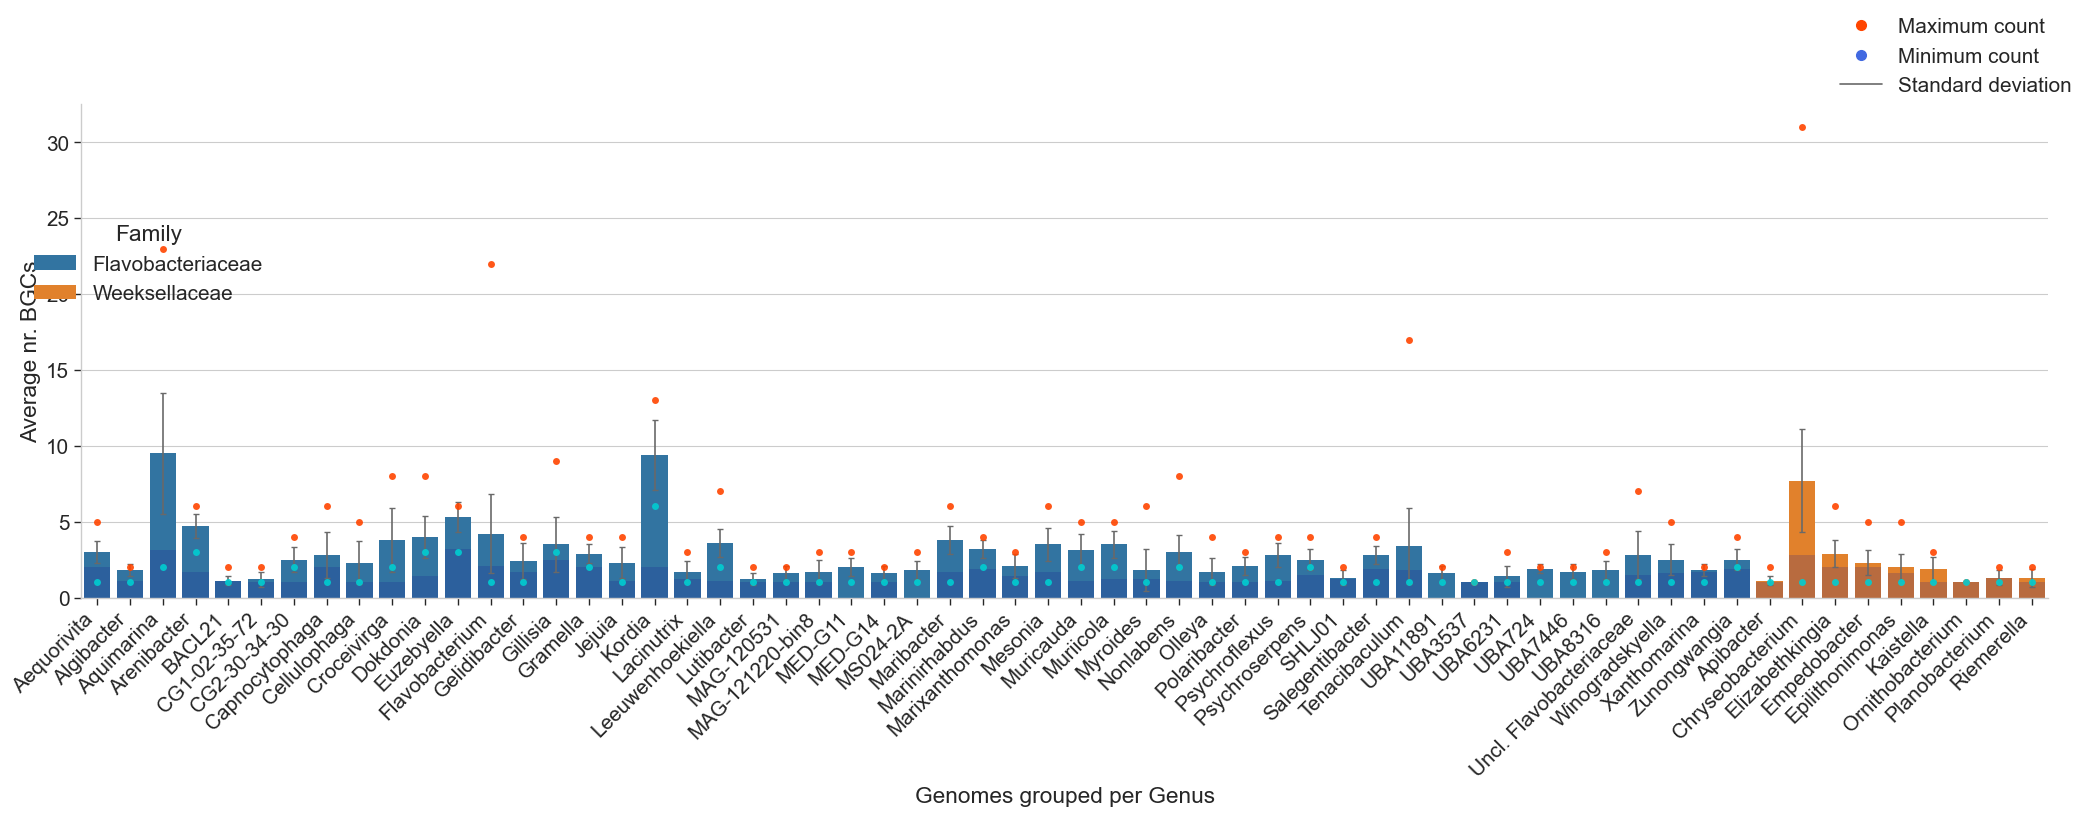

In [27]:
import seaborn as sns
sns.set_style({'font.family': 'Arial'})
#sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.7) 

plt.figure(figsize=(17,6))
g = sns.catplot(
    data=finalx, kind="bar",x='Genus', hue="Family", dodge=False, legend_out=True,
    y='Nr_BGCs_mean', height=6, # make the plot 7 units high
    aspect=3.5) # height is n times width

g._legend.set_bbox_to_anchor((0.12, 0.92))

g.map(plt.errorbar, "Genus", "Nr_BGCs_mean", "Nr_BGCs_std", ls='none', capsize=2, color="dimgrey")

#g.map(plt.scatter(x="Genus",y="Nr_BGCs_max"))

sns.stripplot(x='Genus',y='Nr_BGCs_max', data=finalx, jitter=False, color="orangered", alpha=0.9)
sns.stripplot(x='Genus',y='Nr_BGCs_min', data=finalx, jitter=False, color="darkturquoise", alpha=0.9)

#Second layer, with average known clusters
sns.barplot(x = finalx["Genus"], y =finalx["Known_cluster_count_mean"], data=finalx,color = "#0000A3", alpha=0.2)

plt.xlabel('Genomes grouped per Genus') #, fontsize=15
plt.ylabel('Average nr. BGCs')#fontsize=13

for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

import matplotlib.lines as mlines
red_line = mlines.Line2D([], [], color='orangered', marker='o', ls="",
                          markersize=7, label='Maximum count')
blue_line = mlines.Line2D([], [], color='royalblue', marker='o',ls="",
                          markersize=7, label='Minimum count')
black_line=mlines.Line2D([], [], color='dimgrey', #marker='',
                          markersize=7, label='Standard deviation')
plt.legend(handles=[red_line,blue_line, black_line], bbox_to_anchor=(0.89, 1), loc=(0,2), borderaxespad=0.);

#plt.show()    
ax = plt.gca()
g.savefig("bgcs_notnormalized.svg")

<Figure size 1700x600 with 0 Axes>

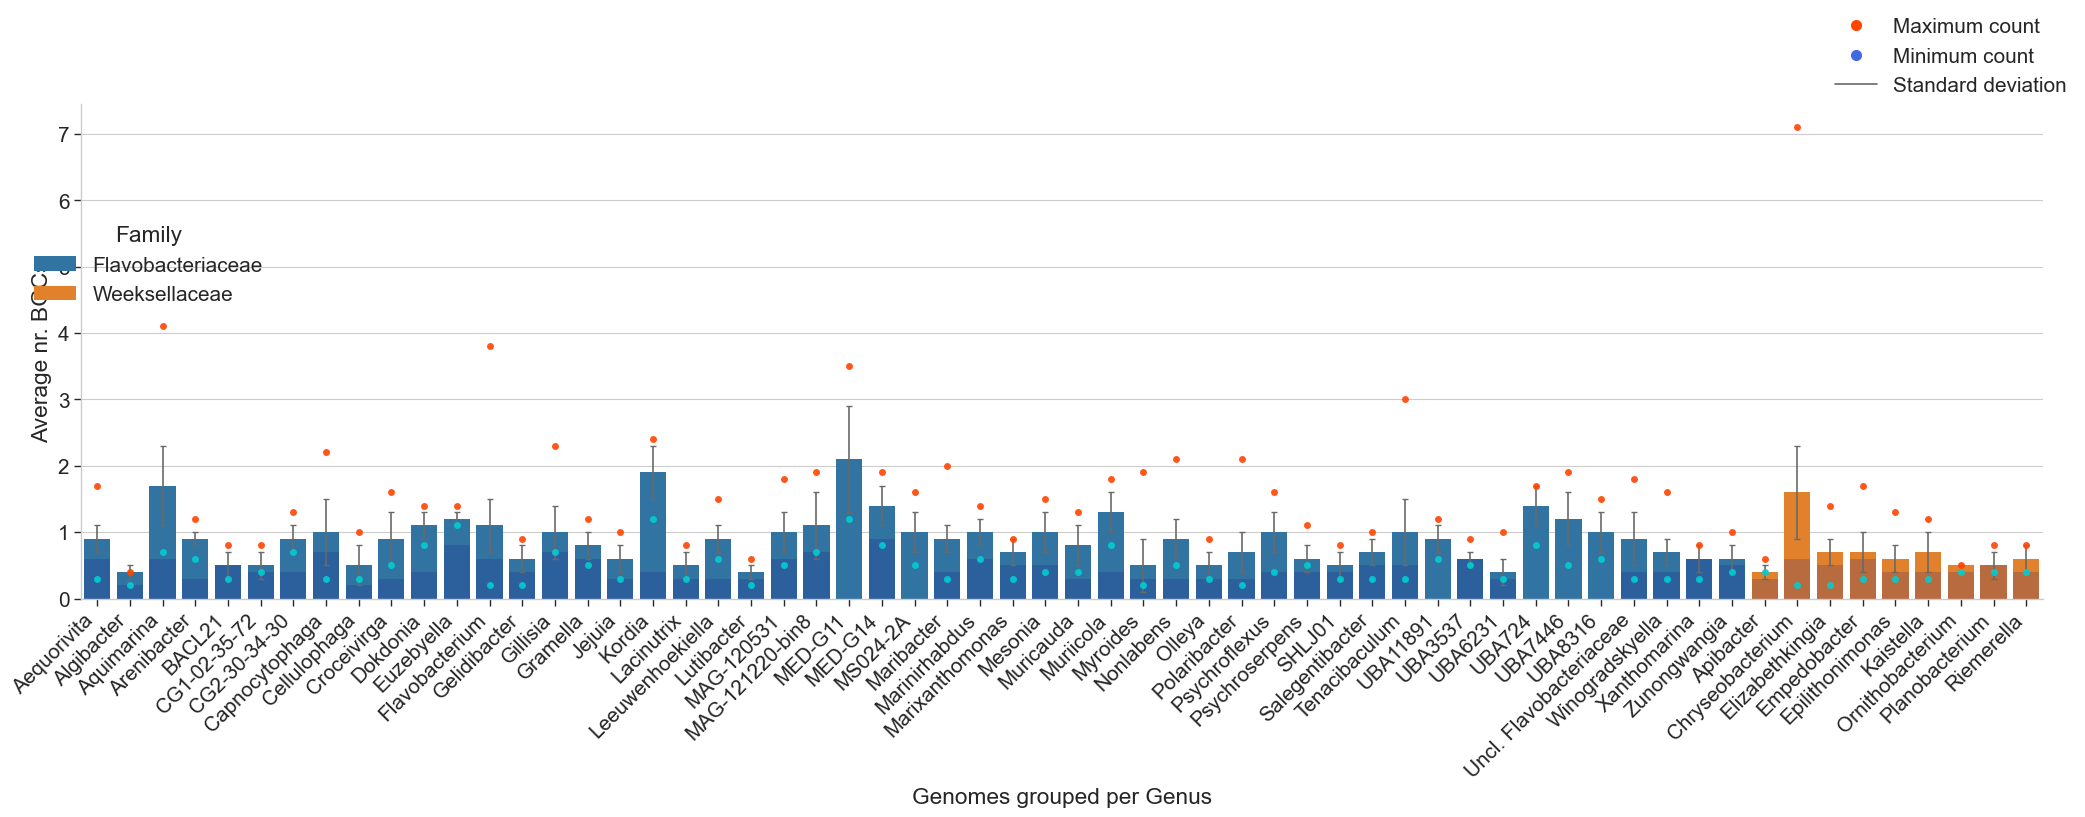

In [28]:
import seaborn as sns
sns.set_style({'font.family': 'Arial'})
#sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.7) 

plt.figure(figsize=(17,6))
g = sns.catplot(data=finalx, kind="bar",x='Genus', hue="Family", dodge=False, legend_out=True,
    y='Nr_BGCs_permb_mean', height=6, # make the plot 7 units high
    aspect=3.5) # height is n times width

g._legend.set_bbox_to_anchor((0.12, 0.92))

g.map(plt.errorbar, "Genus", "Nr_BGCs_permb_mean", "Nr_BGCs_permb_std", ls='none', capsize=2, color="dimgrey")

#g.map(plt.scatter(x="Genus",y="Nr_BGCs_permb_max"))

sns.stripplot(x='Genus',y='Nr_BGCs_permb_max', data=finalx, jitter=False, color="orangered", alpha=0.9)
sns.stripplot(x='Genus',y='Nr_BGCs_permb_min', data=finalx, jitter=False, color="darkturquoise", alpha=0.9)

#Second layer, with average known clusters
sns.barplot(x = finalx["Genus"], y =finalx["Known_cluster_count_permb_mean"], data=finalx,color = "#0000A3", alpha=0.2)

plt.xlabel('Genomes grouped per Genus') #, fontsize=15
plt.ylabel('Average nr. BGCs')#fontsize=13

for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

import matplotlib.lines as mlines
red_line = mlines.Line2D([], [], color='orangered', marker='o', ls="",
                          markersize=7, label='Maximum count')
blue_line = mlines.Line2D([], [], color='royalblue', marker='o',ls="",
                          markersize=7, label='Minimum count')
black_line=mlines.Line2D([], [], color='dimgrey', #marker='',
                          markersize=7, label='Standard deviation')
plt.legend(handles=[red_line,blue_line, black_line], bbox_to_anchor=(0.89, 1), loc=(0,2), borderaxespad=0.);

#plt.show()    
ax = plt.gca()
g.savefig("bgcs_normalized.svg")